In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

import re
import nltk
from nltk.corpus import stopwords
import string
from matplotlib.gridspec import GridSpec

# Load dataset
resumeDataSet = pd.read_csv(r"C:\Users\tejas\Downloads\UpdatedResumeDataSet.csv")
resumeDataSet['cleaned_resume'] = ''


Displaying the distinct categories of resume -
['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']

Displaying the distinct categories of resume and the number of records belonging to each category -
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Databas

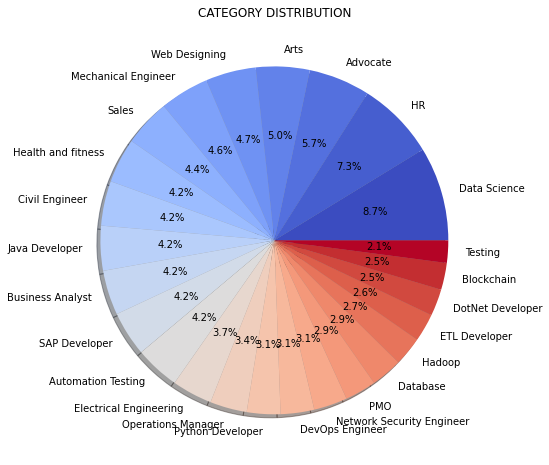

In [2]:
print("Displaying the distinct categories of resume -")
print(resumeDataSet['Category'].unique())

print("\nDisplaying the distinct categories of resume and the number of records belonging to each category -")
print(resumeDataSet['Category'].value_counts())

targetCounts = resumeDataSet['Category'].value_counts()
targetLabels = resumeDataSet['Category'].unique()

plt.figure(1, figsize=(8, 8))
the_grid = GridSpec(1, 1)

cmap = plt.get_cmap('coolwarm')
colors = [cmap(i) for i in np.linspace(0, 1, len(targetLabels))]
plt.subplot(the_grid[0, 0], aspect=1, title='CATEGORY DISTRIBUTION')

plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()


In [3]:
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', ' ', resumeText)  # remove mentions
    resumeText = re.sub(r'[^\w\s]', ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]', r' ', resumeText)  # remove non-ASCII characters
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

# Apply cleaning
resumeDataSet['cleaned_resume'] = resumeDataSet.Resume.apply(lambda x: cleanResume(x))


In [4]:
# Label encoding for the target variable
le = LabelEncoder()
resumeDataSet['Category'] = le.fit_transform(resumeDataSet['Category'])


In [5]:
nltk.download('stopwords')
nltk.download('punkt')

oneSetOfStopWords = set(stopwords.words('english') + ['``', "''"])
totalWords = []
Sentences = resumeDataSet['Resume'].values
cleanedSentences = ""

for i in range(min(len(Sentences), 160)):  # Limit to first 160 for speed
    cleanedText = cleanResume(Sentences[i])
    cleanedSentences += cleanedText + " "
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word.lower() not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word.lower())

wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print("Most common words:\n", mostcommon)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tejas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tejas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Most common words:
 [('details', 488), ('exprience', 446), ('data', 416), ('company', 398), ('months', 394), ('description', 358), ('1', 290), ('project', 254), ('year', 252), ('january', 216), ('learning', 210), ('science', 208), ('less', 204), ('skill', 190), ('python', 176), ('maharashtra', 166), ('6', 164), ('machine', 156), ('education', 146), ('college', 146), ('arts', 144), ('university', 140), ('skills', 134), ('development', 134), ('web', 134), ('like', 126), ('analytics', 120), ('india', 120), ('management', 120), ('application', 120), ('team', 116), ('software', 116), ('using', 110), ('business', 108), ('sql', 104), ('developed', 104), ('monthscompany', 102), ('time', 100), ('used', 98), ('b', 98), ('c', 98), ('experience', 96), ('mumbai', 96), ('projects', 94), ('knowledge', 94), ('analysis', 92), ('technologies', 92), ('hr', 92), ('engineering', 90), ('pune', 90)]


In [37]:
requiredText = resumeDataSet['cleaned_resume'].values
requiredTarget = resumeDataSet['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)

word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print("Feature extraction completed...")

X_train, X_test, y_train, y_test = train_test_split(
    WordFeatures, requiredTarget, random_state=0, test_size=0.2)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Feature extraction completed...
Train shape: (769, 1500)
Test shape: (193, 1500)


In [38]:
clf = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, random_state=42))

clf.fit(X_train, y_train)
prediction = clf.predict(X_test)

print('Accuracy of Random Forest Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of Random Forest Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

print("\nClassification report:\n", metrics.classification_report(y_test, prediction))


Accuracy of Random Forest Classifier on training set: 1.00
Accuracy of Random Forest Classifier on test set: 0.99

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         9
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         9
          14       1.00      1.00      1.00       

In [55]:
# Assuming previous training is complete

# Create a test resume for prediction
test_resume = '''John Doe  
Email: john.doe@example.com  
Phone: +91-9876543210  

Professional Summary:  
Experienced Java Developer with over 5 years of expertise in designing, developing, and maintaining enterprise-level applications. Proficient in Java SE, Java EE, Spring Framework, Hibernate, and RESTful APIs. Strong understanding of OOP concepts, multithreading, and design patterns.

Technical Skills:  
- Programming Languages: Java, SQL, JavaScript  
- Frameworks: Spring Boot, Spring MVC, Hibernate, JPA  
- Databases: MySQL, Oracle, MongoDB  
- Web Technologies: HTML, CSS, Angular  
- Tools: Maven, Jenkins, Git, Docker  
- IDEs: Eclipse, IntelliJ IDEA  

Professional Experience:  
Software Engineer | XYZ Technologies | Bangalore | 2019 – Present  
- Developed and maintained Java-based web applications using Spring Boot and Hibernate.  
- Designed RESTful APIs for seamless integration with frontend and third-party systems.  
- Implemented multithreading and concurrency features to improve application performance.  
- Collaborated with cross-functional teams using Agile methodologies.  

Junior Java Developer | ABC Solutions | Pune | 2016 – 2019  
- Assisted in developing Java EE applications using Servlets and JSP.  
- Worked on database design and writing complex SQL queries for data retrieval and reporting.  
- Participated in code reviews and debugging sessions to improve code quality.  

Education:  
Bachelor of Technology in Computer Science | Some University | 2012 – 2016  

Certifications:  
- Oracle Certified Professional, Java SE 8 Programmer  
- Spring Framework Certified Developer ''' 


# Clean and vectorize the test resume
cleaned_test_resume = cleanResume(test_resume)
test_vector = word_vectorizer.transform([cleaned_test_resume])

# Predict the category using the trained model
predicted_label = clf.predict(test_vector)
predicted_category = le.inverse_transform(predicted_label)

print("Predicted Job Category:", predicted_category[0])


Predicted Job Category: Java Developer


In [56]:
import requests

def get_jobs_adzuna_india(role, location='India', max_results=10, app_id='4a556dbd', app_key='39d86bf8bdb25bcedbf8b6d1906f6f4b'):
    country_code = 'in'  # India
    base_url = f'https://api.adzuna.com/v1/api/jobs/{country_code}/search/1'

    params = {
        'app_id': app_id,
        'app_key': app_key,
        'results_per_page': max_results,
        'what': role,
        'where': location,
        'content-type': 'application/json'
    }

    response = requests.get(base_url, params=params)
    if response.status_code == 200:
        data = response.json()
        jobs = []
        for job in data.get('results', []):
            jobs.append({
                'title': job.get('title'),
                'company': job.get('company', {}).get('display_name'),
                'location': job.get('location', {}).get('display_name'),
                'description': job.get('description'),
                'url': job.get('redirect_url')
            })
        return jobs
    else:
        print("Error fetching jobs:", response.status_code)
        return []
  # Your model's predicted category

jobs = get_jobs_adzuna_india(predicted_category[0])

for i, job in enumerate(jobs, 1):
    print(f"Job {i}: {job['title']} at {job['company']} ({job['location']})")
    print(f"Description (first 200 chars): {job['description'][:200]}...")
    print(f"Apply here: {job['url']}\n")


Job 1: java Developer at RN Jobforce (India)
Description (first 200 chars): Company Description RN JobForce is a platform with cutting-edge job search tools and a growing professional community that empowers job seekers and employers worldwide to find opportunities and advanc...
Apply here: https://www.adzuna.in/land/ad/5224308160?se=mkg3RQw-8BGcayucCbaCew&utm_medium=api&utm_source=4a556dbd&v=027AC2CA0F4B90C4BED7F36521D2B39790843AAA

Job 2: Java Developer at MNR Solution Pvt. Ltd. (Noida, Ghaziabad)
Description (first 200 chars): Java Developer We are seeking an experienced Java Developer to join our team in Noida. The ideal candidate will have 5 to 8 years of hands-on experience in Java development and expertise in working wi...
Apply here: https://www.adzuna.in/land/ad/5159136451?se=mkg3RQw-8BGcayucCbaCew&utm_medium=api&utm_source=4a556dbd&v=B7E1607E1409A7966F2658DABC167313495676A7

Job 3: Java Developer at Live Connections (Chennai, Tamil Nadu)
Description (first 200 chars): Immedia